In [13]:
import random

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [30]:
prim_letra = ["q", "w", "x", "z"]
seg_letra = ["a", "i", "u"]
ter_letra = ["c", "f", "p"]
quar_letra = ["e", "o"]

random.seed(42)

In [28]:
def cria_lista_palavras(num_iter=1):
    word_list = []
    for _ in range(num_iter):
        c1 = random.choice(prim_letra)
        c2 = random.choice(seg_letra)
        c3 = random.choice(ter_letra)
        c4 = random.choice(quar_letra)

        word = c1 + c2 + c3 + c4
        word_list.append(word)

    return word_list


def calcula_porcentagem(word_list):
    dict_percent = {}
    for word in set(word_list):
        appearances = word_list.count(word)
        dict_percent[word] = [appearances]
    return dict_percent


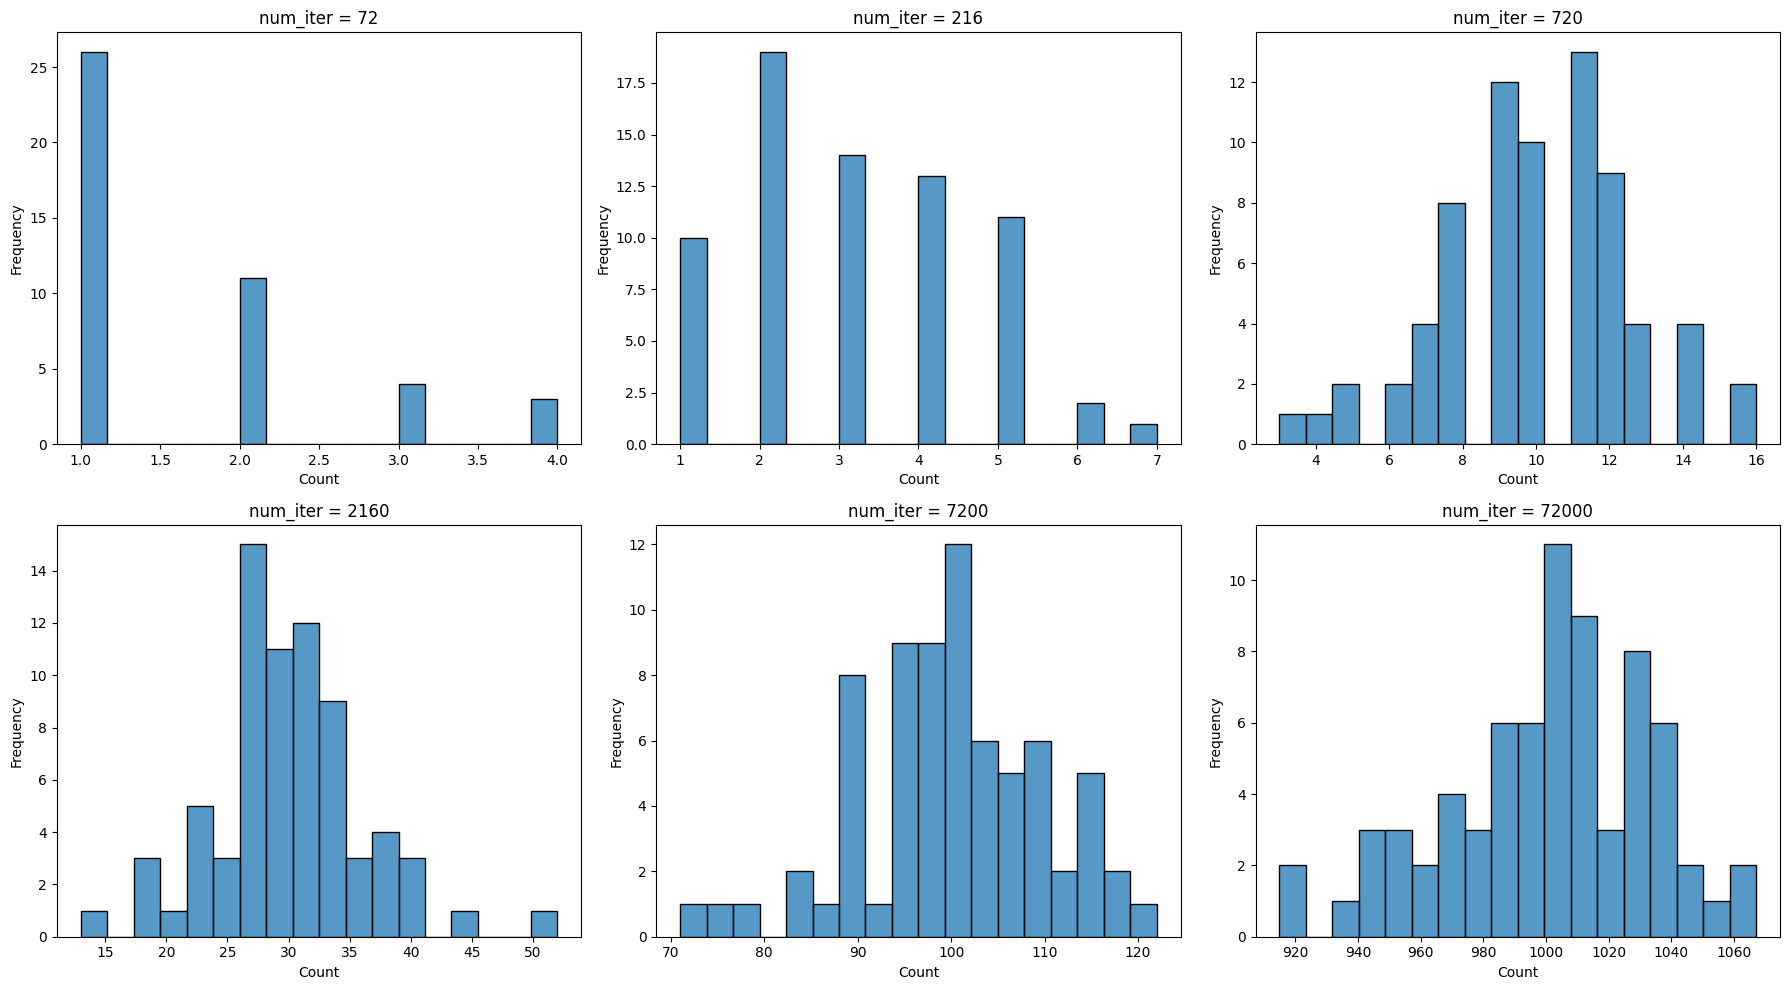

In [34]:
num_iters = [72, 216, 720, 2160, 7200, 72000]
words_of_interest = ["qace", "qice", "wace", "wice", "xace", "zupo"]

df = pd.DataFrame()
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns

axes = axes.flatten()  # Make it easier to index

for idx, num in enumerate(num_iters):
    word_list = cria_lista_palavras(num)
    result = pd.DataFrame(calcula_porcentagem(word_list))
    sns.histplot(result.iloc[0], ax=axes[idx], bins=18)
    axes[idx].set_title(f"num_iter = {num}")
    axes[idx].set_xlabel("Count")
    axes[idx].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [ ]:
result_df = pd.DataFrame()

for num in num_iters:
    word_list = cria_lista_palavras(num)
    result = pd.DataFrame(calcula_porcentagem(word_list))
    result = result.reset_index()
    result["index"] = num
    result_df = pd.concat([result_df, result])

result_df = result_df.T
result_df = result_df.reset_index()
result_df["expected_percentage"] = 1.38


In [17]:
result_df

,index,0,0,0,0,0,0,expected_percentage
0,index,72.0,216.0,720.0,2160.0,7200.0,72000.0,1.38
1,quco,1.0,4.0,8.0,30.0,104.0,957.0,1.38
2,wupo,1.0,3.0,8.0,34.0,90.0,984.0,1.38
3,wafe,1.0,5.0,10.0,31.0,95.0,988.0,1.38
4,qife,2.0,2.0,9.0,25.0,106.0,988.0,1.38
...,...,...,...,...,...,...,...,...
68,wipo,NaN,3.0,15.0,30.0,100.0,1006.0,1.38
69,wice,NaN,5.0,8.0,34.0,104.0,942.0,1.38
70,xipo,NaN,5.0,9.0,32.0,100.0,963.0,1.38
71,qace,NaN,8.0,16.0,24.0,91.0,1008.0,1.38
